## CASE STUDY 004

Aplicando SOM para análise do acumulado de flashes horário em cada cidade

In [1]:
import sys; sys.path.insert(0, "/home/adriano/sthunder")
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sthunder import constants as const
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from mpl_toolkits.axes_grid1 import make_axes_locatable

from minisom import MiniSom

In [2]:
flashes_df = pd.read_csv("/glm/city_state.csv")

flashes_df['datetime'] = pd.to_datetime(flashes_df['datetime'])
flashes_df = flashes_df.set_index('datetime', drop=True)


flashes_df.head()

city  uf  total           coords
datetime                                                        
2020-01-01 00:00:00  Abel Figueiredo  PA      0  POINT(-48.5 -5)
2020-01-01 01:00:00  Abel Figueiredo  PA      0  POINT(-48.5 -5)
2020-01-01 02:00:00  Abel Figueiredo  PA      0  POINT(-48.5 -5)
2020-01-01 03:00:00  Abel Figueiredo  PA      0  POINT(-48.5 -5)
2020-01-01 04:00:00  Abel Figueiredo  PA      0  POINT(-48.5 -5)

In [3]:
flashes_df = flashes_df.groupby(
    ['city', pd.Grouper(freq='D')]
).aggregate({'total': 'sum'}).reset_index()

flashes_df['datetime'] = pd.to_datetime(flashes_df['datetime'])
flashes_df = flashes_df.set_index('datetime')
flashes_df.head()

city  total
datetime                          
2020-01-01  Abel Figueiredo      0
2020-01-02  Abel Figueiredo      1
2020-01-03  Abel Figueiredo      4
2020-01-04  Abel Figueiredo      0
2020-01-05  Abel Figueiredo      0

In [4]:
pivot = flashes_df.reset_index().pivot(columns='city', index='datetime', values='total')
pivot.head()

city        Abel Figueiredo  Acaraú  Acará  Acopiara  Acrelândia  Acreúna  \
datetime                                                                    
2020-01-01                0       0     20         3           1       47   
2020-01-02                1       0    186         0           0        0   
2020-01-03                4       0    185         0           0      110   
2020-01-04                0       1    190         0           0      352   
2020-01-05                0       0    581         0           0       21   

city        Adamantina  Adustina  Afonso Bezerra  Afonso Cláudio  ...  \
datetime                                                          ...   
2020-01-01         252         0             264               0  ...   
2020-01-02         480         0               0             972  ...   
2020-01-03         218         0               0             502  ...   
2020-01-04           0         0               0               0  ...   
2020-01-05         279         0               0             218  ...   

city        Água Boa  Água Clara  Água Comprida  Água Doce  \
datetime                                                     
2020-01-01      1993          12             65        149   
2020-01-02       607         400            704          9   
2020-01-03        17         200            904          0   
2020-01-04         1        1795           1681        140   
2020-01-05       139         269            413        172   

city        Água Doce do Norte  Água Fria de Goiás  Águas Belas  \
datetime                                                          
2020-01-01                  15                 119           78   
2020-01-02                 802                   1            0   
2020-01-03                 421                   0            0   
2020-01-04                  40                   0            0   
2020-01-05                   6                   0            0   

city        Águas Formosas  Érico Cardoso  Óbidos  
datetime                                           
2020-01-01             416            331       1  
2020-01-02               2            122       0  
2020-01-03             238             19       0  
2020-01-04             249             52     337  
2020-01-05               0              0     181  

[5 rows x 1439 columns]

In [7]:
np.sqrt(5*np.sqrt(1439))

13.772101051905864

In [76]:
pivot.T

datetime            2020-01-01  2020-01-02  2020-01-03  2020-01-04  \
city                                                                 
Abel Figueiredo              0           1           4           0   
Acaraú                       0           0           0           1   
Acará                       20         186         185         190   
Acopiara                     3           0           0           0   
Acrelândia                   1           0           0           0   
...                        ...         ...         ...         ...   
Água Fria de Goiás         119           1           0           0   
Águas Belas                 78           0           0           0   
Águas Formosas             416           2         238         249   
Érico Cardoso              331         122          19          52   
Óbidos                       1           0           0         337   

datetime            2020-01-05  2020-01-06  2020-01-07  2020-01-08  \
city                                                                 
Abel Figueiredo              0           3          11          32   
Acaraú                       0           0           0           0   
Acará                      581         173           0          81   
Acopiara                     0           0          17           0   
Acrelândia                   0          62           0          34   
...                        ...         ...         ...         ...   
Água Fria de Goiás           0           0           8           9   
Águas Belas                  0           0           0           0   
Águas Formosas               0         225           0           0   
Érico Cardoso                0          65           6           0   
Óbidos                     181         111           3           0   

datetime            2020-01-09  2020-01-10  ...  2020-12-22  2020-12-23  \
city                                        ...                           
Abel Figueiredo            439           0  ...           2           0   
Acaraú                      54         510  ...           0           0   
Acará                      150           8  ...          10           0   
Acopiara                     0         185  ...           0           0   
Acrelândia                   5          27  ...          82           0   
...                        ...         ...  ...         ...         ...   
Água Fria de Goiás         299           0  ...         115          22   
Águas Belas                  0           0  ...           0           0   
Águas Formosas               0           0  ...           0           0   
Érico Cardoso                0           0  ...           0           0   
Óbidos                       0           0  ...         441          73   

datetime            2020-12-24  2020-12-25  2020-12-26  2020-12-27  \
city                                                                 
Abel Figueiredo            815           0           0          36   
Acaraú                       0           0           0           0   
Acará                      199           3          13         344   
Acopiara                     0           0           0           0   
Acrelândia                   5          10          30           0   
...                        ...         ...         ...         ...   
Água Fria de Goiás           2         138          33         651   
Águas Belas                  0           0           0           0   
Águas Formosas               0           0           0           0   
Érico Cardoso                0           0           0           0   
Óbidos                     638         476          84          10   

datetime            2020-12-28  2020-12-29  2020-12-30  2020-12-31  
city                                                                
Abel Figueiredo              0        1081         390         950  
Acaraú                       0           0           0           0  
Acará          

In [21]:
# norm = MinMaxScaler(feature_range=(0, 1))
# data = norm.fit_transform(pivot.values.T)
data = pivot.values.T
nrow, ncol = 13, 13

SOM = MiniSom(x=nrow, y=ncol, input_len=data.shape[1], sigma=3,learning_rate=0.7, 
              neighborhood_function='gaussian',
             topology='rectangular', activation_distance='euclidean', random_seed=42)
SOM.random_weights_init(data=data)
SOM.train_random(data=data, num_iteration=2000)

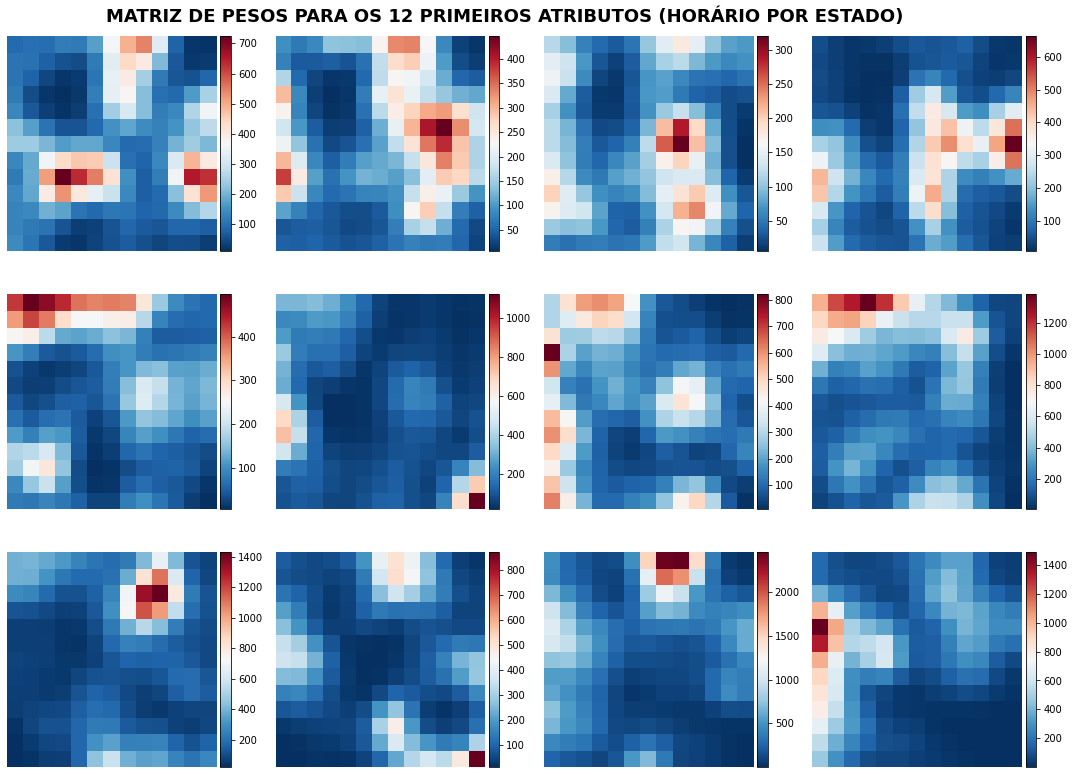

In [22]:
dpi = 100
width = np.round(1366 * 135 / 100)
height = 768*1.75
    
fig, ax = plt.subplots(3, 4, figsize=(width/dpi, height/dpi), facecolor = 'white')
fig.suptitle(f"MATRIZ DE PESOS PARA OS 12 PRIMEIROS ATRIBUTOS (HORÁRIO POR ESTADO)", 
             fontsize=18, fontweight='bold', y=0.91)

for i in range(12):
    row = i//4
    col = i%4
    
    divider = make_axes_locatable(ax[row][col])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    img = ax[row][col].pcolor(SOM._weights[:, :, i], cmap='RdBu_r')
    fig.colorbar(img, cax=cax, orientation='vertical')
    ax[row][col].axis('off')
    
plt.savefig(f"../weights_uf_hourly_nn.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)

(0.0, 13.0)

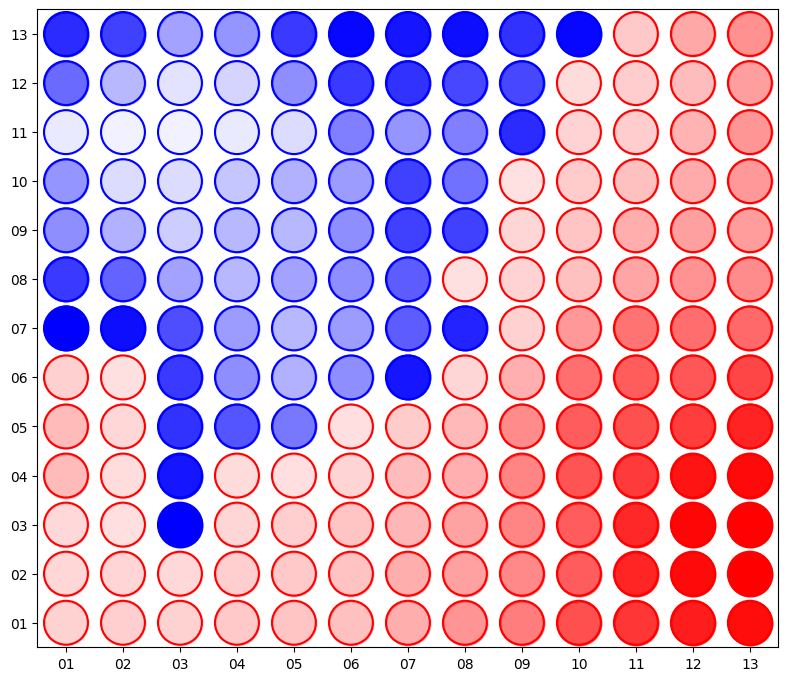

In [23]:
color_map = np.full((*SOM._weights.shape[:-1],), 'white')
alpha_map = np.full((*SOM._weights.shape[:-1],), 0.)

P90 = np.percentile(data.ravel(), 90)
THR = 0.10
markersize = 1000
linewidth = 1.5

for i in np.arange(SOM._weights.shape[0]):
    for j in np.arange(SOM._weights.shape[1]):
        w = SOM._weights[i, j, :]
        act = w[w>=P90].shape[0]
        ina = w[w<P90].shape[0]
        
        if act/(act+ina) >= THR:
            color_map[i][j] = 'red'
            alpha_map[i][j] = act/(act+ina)
        else:
            color_map[i][j] = 'blue'
            alpha_map[i][j] = act/(act+ina)
            
xb, yb = np.where(color_map == 'blue')
xr, yr = np.where(color_map == 'red')

if xb.shape[0] > 0:
    alpha_map[xb, yb] = alpha_map[xb, yb]/alpha_map[xb, yb].max()
    
if xr.shape[0] > 0:
    alpha_map[xr, yr] = alpha_map[xr, yr]/alpha_map[xr, yr].max()


dpi = 100
width = np.round(1366 * 70 / 100)
height = 768*1.1
facecolor = 'white'

fig, ax = plt.subplots(figsize=(width/dpi, height/dpi), 
                       dpi=dpi, facecolor=facecolor)

for i in range(color_map.shape[0]):
    for j in range(color_map.shape[1]):
        ax.scatter([i+.5], [j+.5], color=color_map[i][j], marker='o', s=1000, alpha=alpha_map[i][j], 
                lw=1.5, ec=color_map[i][j], zorder=1)
        ax.scatter([i+.5], [j+.5], color='none', marker='o', s=1000,
                lw=1.5, ec=color_map[i][j], zorder=2)
       
ax.set_xticks(np.arange(nrow)+0.5)
ax.set_xticklabels([str(v).zfill(2) for v in np.arange(nrow)+1])
ax.set_yticks(np.arange(ncol)+0.5)
ax.set_yticklabels([str(v).zfill(2) for v in np.arange(ncol)+1])
ax.set_xlim([0, color_map.shape[0]])
ax.set_ylim([0, color_map.shape[1]])

9.0
29.0
71.0
157.0
335.0
393.0
463.0
550.0
662.0
808.0
1312.0
3011.2700000000186


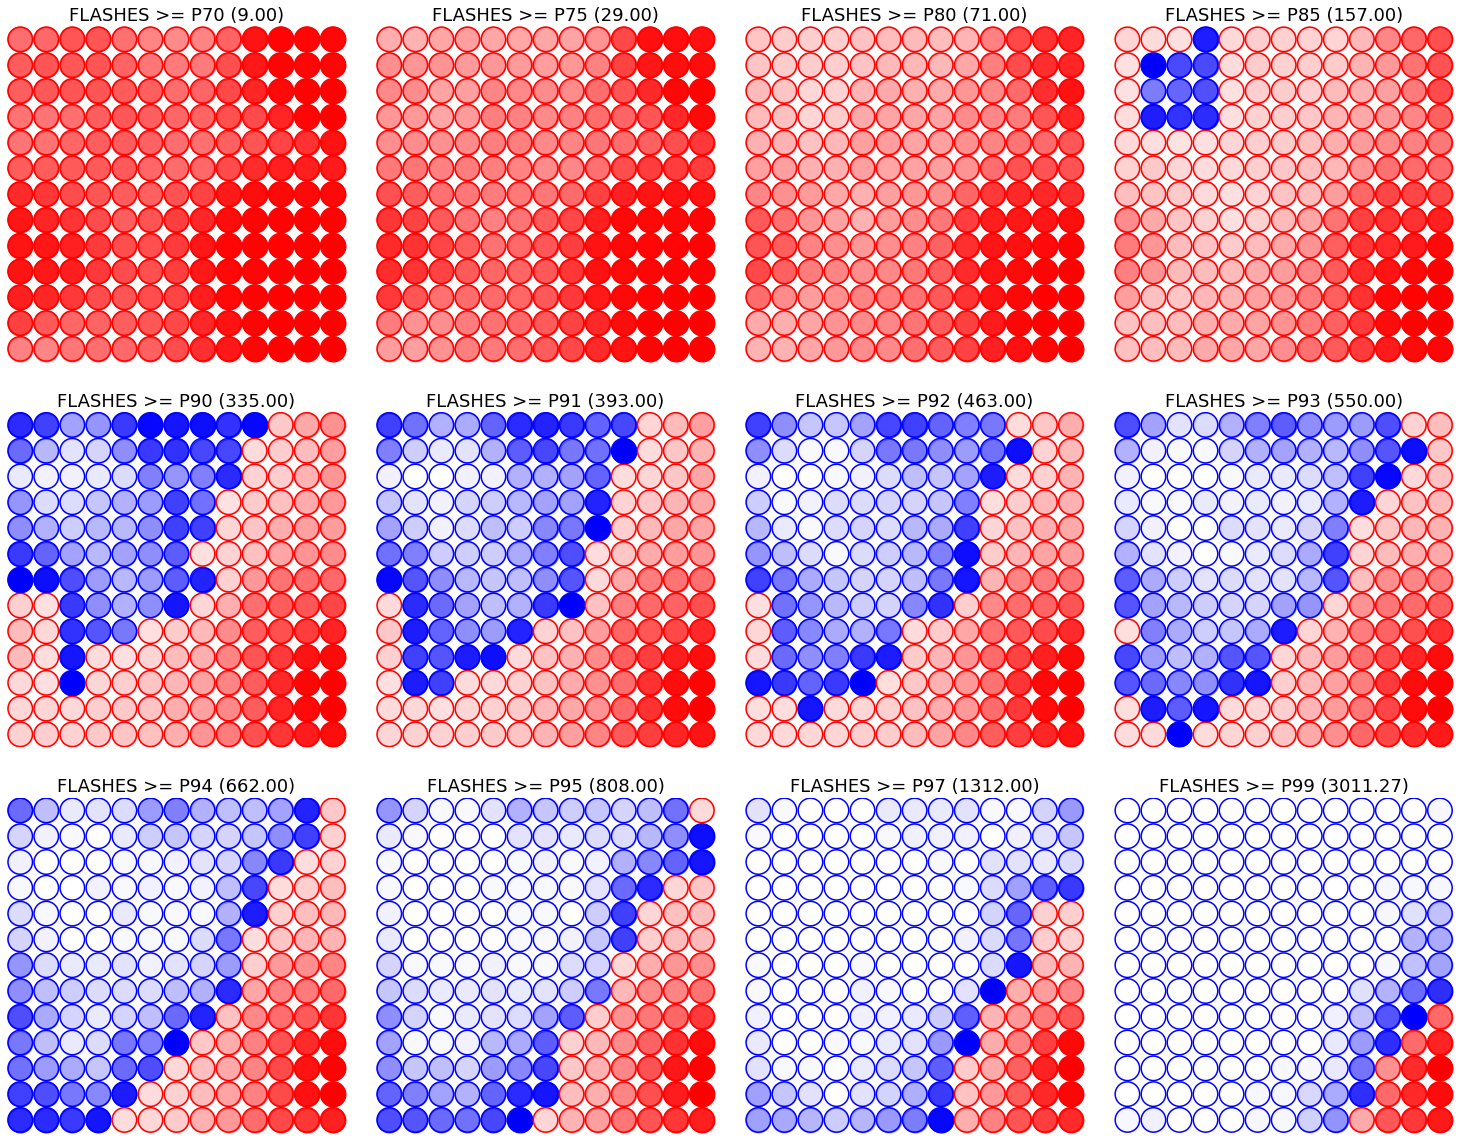

In [28]:
dpi = 100
width = np.round(1366 * 147 / 100)
height = 768*2.65
    
fig, ax = plt.subplots(3, 4, figsize=(width/dpi, height/dpi), facecolor = 'white')

PS = [
    70, 75, 80, 85, 90, 91, 92, 93, 94, 95, 97, 99
]
PCT = [np.percentile(data.ravel(), pn) for pn in PS]

titles = [f"FLASHES >= P{pn} ({PCT[i]:.2f})" for i, pn in enumerate(PS)]

for x in range(12):
    row = x//4
    col = x%4
    
    color_map = np.full((*SOM._weights.shape[:-1],), 'white')
    alpha_map = np.full((*SOM._weights.shape[:-1],), 0.)
    
    P90 = PCT[x]
    print(P90)
    THR = 0.10
    markersize = 1000
    linewidth = 1.5

    for i in np.arange(SOM._weights.shape[0]):
        for j in np.arange(SOM._weights.shape[1]):
            w = SOM._weights[i, j, :]
            act = w[w>=P90].shape[0]
            ina = w[w<P90].shape[0]

            if act/(act+ina) >= THR:
                color_map[i][j] = 'red'
                alpha_map[i][j] = act/(act+ina)
            else:
                color_map[i][j] = 'blue'
                alpha_map[i][j] = act/(act+ina)

    xb, yb = np.where(color_map == 'blue')
    xr, yr = np.where(color_map == 'red')
    
    if len(xb) > 0:
        alpha_map[xb, yb] = alpha_map[xb, yb]/alpha_map[xb, yb].max()
    if len(xr) > 0:
        alpha_map[xr, yr] = alpha_map[xr, yr]/alpha_map[xr, yr].max()

    for i in range(color_map.shape[0]):
        for j in range(color_map.shape[1]):
            ax[row][col].scatter([i+.5], [j+.5], color=color_map[i][j], marker='o', s=600, alpha=alpha_map[i][j], 
                    lw=1.5, ec=color_map[i][j], zorder=1)
            ax[row][col].scatter([i+.5], [j+.5], color='none', marker='o', s=600,
                    lw=1.5, ec=color_map[i][j], zorder=2)

#     ax[row][col].set_xticks(np.arange(nrow)+0.5)
#     ax[row][col].set_xticklabels([str(v).zfill(2) for v in np.arange(nrow)+1])
#     ax[row][col].set_yticks(np.arange(ncol)+0.5)
#     ax[row][col].set_yticklabels([str(v).zfill(2) for v in np.arange(ncol)+1])
    ax[row][col].set_title(titles[x], fontdict={'size': 18})
    ax[row][col].axis('off')
    
    ax[row][col].set_xlim([0, color_map.shape[0]])
    ax[row][col].set_ylim([0, color_map.shape[1]])
#     break

plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                        hspace=0.15, wspace=0.09)

plt.savefig(f"../neurons_percentile_variation_city.png", dpi=dpi,
                transparent=False, bbox_inches='tight', pad_inches=0.1)

In [29]:
color_map = np.full((*SOM._weights.shape[:-1],), 'white')
alpha_map = np.full((*SOM._weights.shape[:-1],), 0.)

P90 = np.percentile(data.ravel(), 90)
THR = 0.10
markersize = 1000
linewidth = 1.5

for i in np.arange(SOM._weights.shape[0]):
    for j in np.arange(SOM._weights.shape[1]):
        w = SOM._weights[i, j, :]
        act = w[w>=P90].shape[0]
        ina = w[w<P90].shape[0]

        if act/(act+ina) >= THR:
            color_map[i][j] = 'red'
            alpha_map[i][j] = act/(act+ina)
        else:
            color_map[i][j] = 'blue'
            alpha_map[i][j] = act/(act+ina)

xb, yb = np.where(color_map == 'blue')
xr, yr = np.where(color_map == 'red')

if len(xb) > 0:
    alpha_map[xb, yb] = alpha_map[xb, yb]/alpha_map[xb, yb].max()
if len(xr) > 0:
    alpha_map[xr, yr] = alpha_map[xr, yr]/alpha_map[xr, yr].max()

In [32]:
pivot.T

datetime            2020-01-01  2020-01-02  2020-01-03  2020-01-04  \
city                                                                 
Abel Figueiredo              0           1           4           0   
Acaraú                       0           0           0           1   
Acará                       20         186         185         190   
Acopiara                     3           0           0           0   
Acrelândia                   1           0           0           0   
...                        ...         ...         ...         ...   
Água Fria de Goiás         119           1           0           0   
Águas Belas                 78           0           0           0   
Águas Formosas             416           2         238         249   
Érico Cardoso              331         122          19          52   
Óbidos                       1           0           0         337   

datetime            2020-01-05  2020-01-06  2020-01-07  2020-01-08  \
city                                                                 
Abel Figueiredo              0           3          11          32   
Acaraú                       0           0           0           0   
Acará                      581         173           0          81   
Acopiara                     0           0          17           0   
Acrelândia                   0          62           0          34   
...                        ...         ...         ...         ...   
Água Fria de Goiás           0           0           8           9   
Águas Belas                  0           0           0           0   
Águas Formosas               0         225           0           0   
Érico Cardoso                0          65           6           0   
Óbidos                     181         111           3           0   

datetime            2020-01-09  2020-01-10  ...  2020-12-22  2020-12-23  \
city                                        ...                           
Abel Figueiredo            439           0  ...           2           0   
Acaraú                      54         510  ...           0           0   
Acará                      150           8  ...          10           0   
Acopiara                     0         185  ...           0           0   
Acrelândia                   5          27  ...          82           0   
...                        ...         ...  ...         ...         ...   
Água Fria de Goiás         299           0  ...         115          22   
Águas Belas                  0           0  ...           0           0   
Águas Formosas               0           0  ...           0           0   
Érico Cardoso                0           0  ...           0           0   
Óbidos                       0           0  ...         441          73   

datetime            2020-12-24  2020-12-25  2020-12-26  2020-12-27  \
city                                                                 
Abel Figueiredo            815           0           0          36   
Acaraú                       0           0           0           0   
Acará                      199           3          13         344   
Acopiara                     0           0           0           0   
Acrelândia                   5          10          30           0   
...                        ...         ...         ...         ...   
Água Fria de Goiás           2         138          33         651   
Águas Belas                  0           0           0           0   
Águas Formosas               0           0           0           0   
Érico Cardoso                0           0           0           0   
Óbidos                     638         476          84          10   

datetime            2020-12-28  2020-12-29  2020-12-30  2020-12-31  
city                                                                
Abel Figueiredo              0        1081         390         950  
Acaraú                       0           0           0           0  
Acará          

In [33]:
ngdf = gpd.read_file(
    const.SHP_BRAZIL_CITIES
).set_index('nome').loc[pivot.T.index][['geometry']]

ngdf.head()

geometry
nome                                                              
Abel Figueiredo  POLYGON ((-48.57061 -4.82441, -48.54873 -4.828...
Acaraú           POLYGON ((-40.31697 -2.80534, -40.26131 -2.810...
Acará            POLYGON ((-48.32328 -1.46641, -48.30653 -1.470...
Acopiara         POLYGON ((-39.56759 -5.98316, -39.56142 -6.008...
Acrelândia       POLYGON ((-67.13305 -9.67614, -67.05956 -9.708...

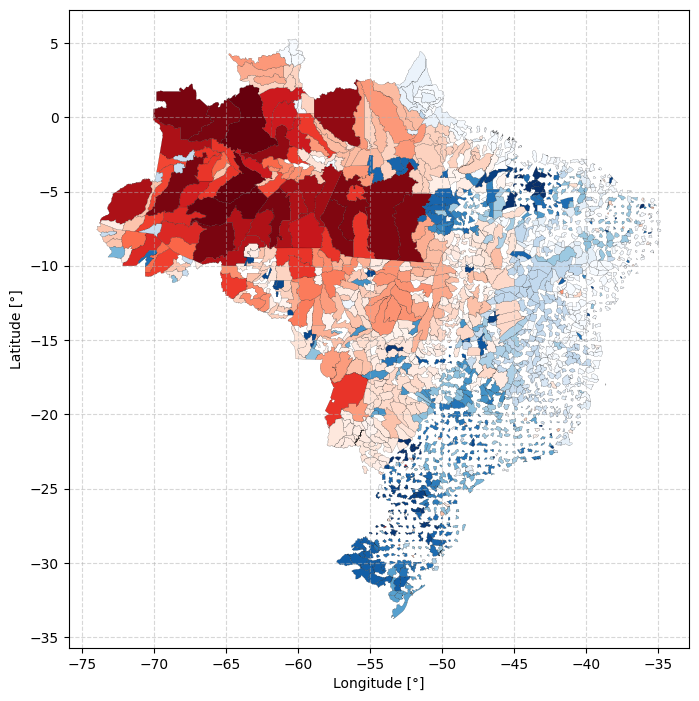

In [43]:
c, a = [], []
for i, (state, row) in enumerate(ngdf.iterrows()):
    winner = SOM.winner(pivot[[state]].values.T[0])

    c.append(color_map[winner[0]][winner[1]])
    a.append(alpha_map[winner[0]][winner[1]])

ngdf['color'] = c
ngdf['alpha'] = a

dpi = 100
width = np.round(1366 * 70 / 100)
height = 768*1.1
facecolor = 'white'

fig, ax = plt.subplots(figsize=(width/dpi, height/dpi), 
                       dpi=dpi, facecolor=facecolor)

# ax.set_title(const.TITLE_SINGLE_DENSITY_CITY_MAP, 
#              fontdict=const.STYLE_TITLE)
ax.grid(ls='--', alpha=0.5)
ax.set_xlabel("Longitude [°]")
ax.set_ylabel("Latitude [°]")

ngdf[ngdf['color'] == 'red'].plot(cmap='Reds', ec='k', lw=0.1, 
                                  column='alpha', ax=ax)
ngdf[ngdf['color'] == 'blue'].plot(cmap='Blues', ec='k', lw=0.1, 
                                   column='alpha', ax=ax)

plt.savefig(f"../single_density_state_map_city.png", 
            transparent=False, bbox_inches='tight', pad_inches=0.1)
    

In [51]:
def plot_state_map_prob():
    ngdf = gpd.read_file(
        const.SHP_BRAZIL_STATES
    ).set_index('sigla').loc[pivot.columns][['geometry']]

    ngdf.head()
    np.random.seed(42)
    c, a, mh = [], [], []
    for i, (state, row) in enumerate(ngdf.iterrows()):
        x, y = SOM.winner(pivot[[state]].values.T[0])

        if color_map[x][y] == 'blue':
            sc = prob = np.random.choice(['blue', 'red'], 1, p=[alpha_map[x][y], 1-alpha_map[x][y]])[0]
            if sc == 'blue':
    #             print(state, "blue -> blue", alpha_map[x][y], 1-alpha_map[x][y])
                sa = alpha_map[x][y]
                mh.append(1)
            else:
    #             print(state, "blue -> red", alpha_map[x][y], 1-alpha_map[x][y])
                sa = 1-alpha_map[x][y]
                mh.append(0)
        else:
            sc = prob = np.random.choice(['red', 'blue'], 1, p=[alpha_map[x][y], 1-alpha_map[x][y]])[0]
            if sc == 'red':
                mh.append(1)
    #             print(state, "red -> red", alpha_map[x][y], 1-alpha_map[x][y])
                sa = alpha_map[x][y]
            else :
    #             print(state, "red -> blue", alpha_map[x][y], 1-alpha_map[x][y])
                sa = 1-alpha_map[x][y]
                mh.append(0)

        c.append(sc)
        a.append(sa)

    ngdf['color'] = c
    ngdf['alpha'] = a
    ngdf['misshit'] = mh

    dpi = 100
    width = np.round(1366 * 70 / 100)
    height = 768*1.1
    facecolor = 'white'

    fig, ax = plt.subplots(figsize=(width/dpi, height/dpi), 
                           dpi=dpi, facecolor=facecolor)

    ax.set_title(const.TITLE_SINGLE_DENSITY_CITY_MAP, 
                 fontdict=const.STYLE_TITLE)
    ax.grid(ls='--', alpha=0.5)
    ax.set_xlabel("Longitude [°]")
    ax.set_ylabel("Latitude [°]")

    ngdf[ngdf['color'] == 'red'].plot(cmap='Reds', ec='k', lw=0.1, 
                                      column='alpha', ax=ax)
    ngdf[ngdf['color'] == 'blue'].plot(cmap='Blues', ec='k', lw=0.1, 
                                       column='alpha', ax=ax)

    plt.savefig(f"../single_density_state_map_prob.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
    return ngdf

NameError: name 'plot_state_map_original' is not defined

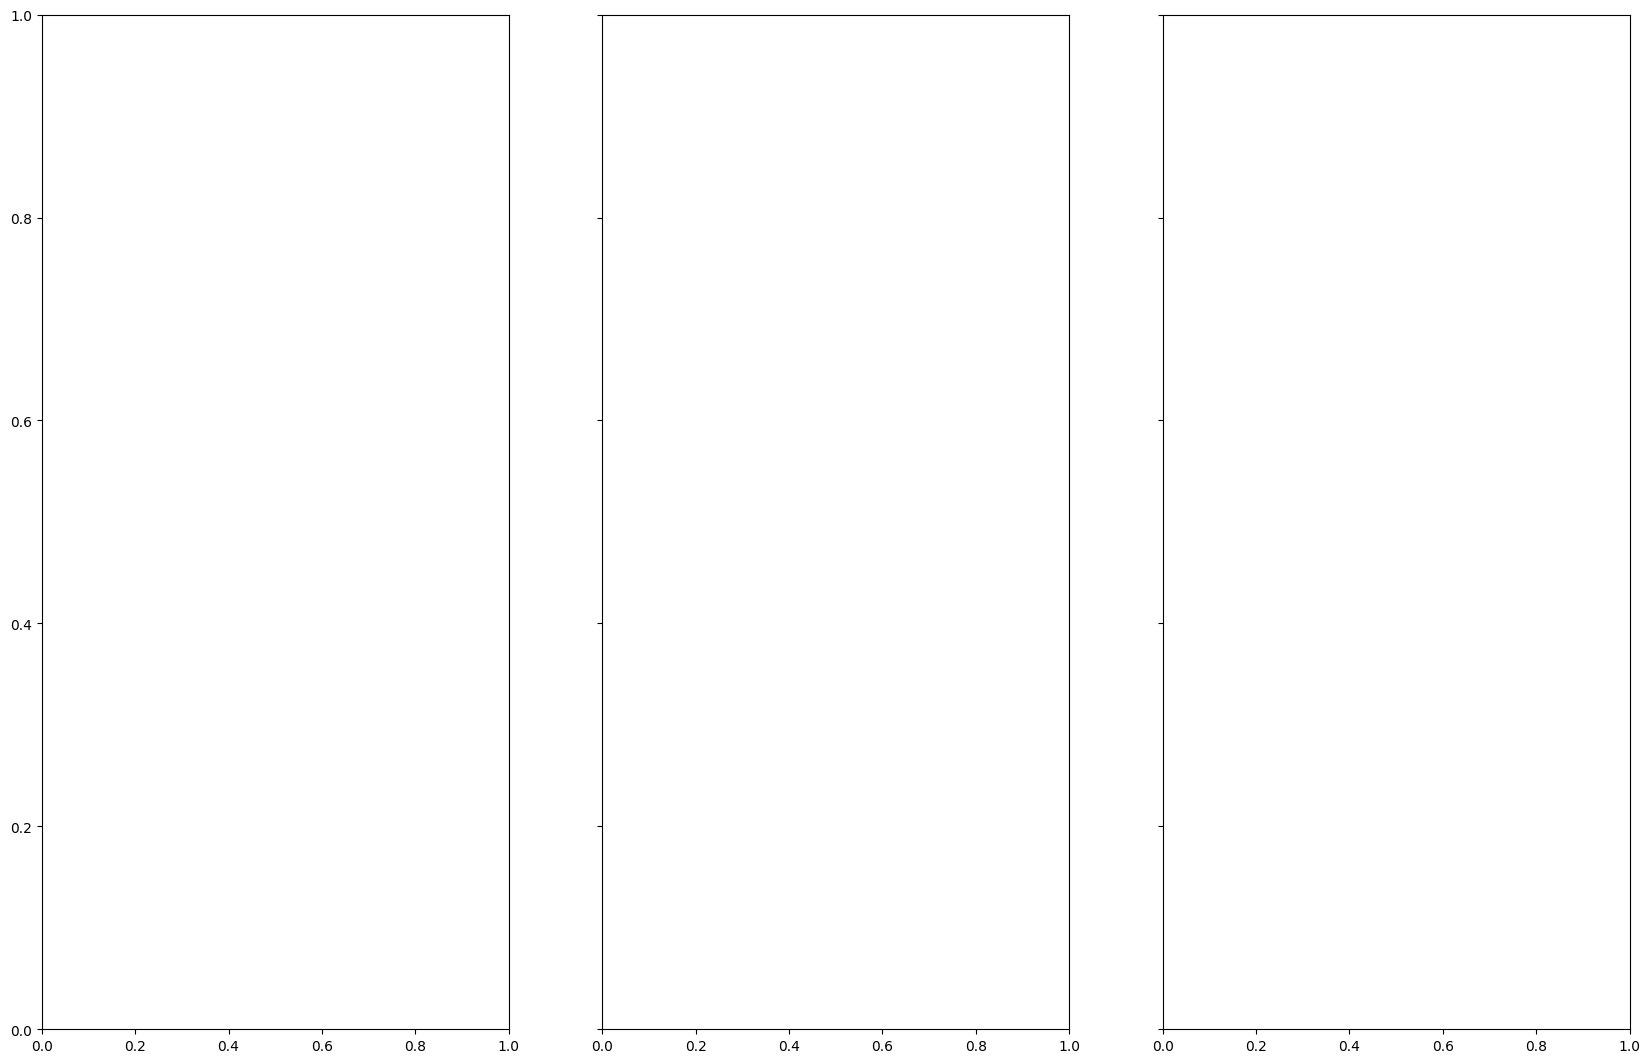

In [52]:
dpi = 100
width = np.round(1366 * 150 / 100)
height = 768*1.75

fig, ax = plt.subplots(1, 3, figsize=(width/dpi, height/dpi), 
                       dpi=dpi, facecolor='w', sharex=True, sharey=True)

orig_map = plot_state_map_original()
# prob_map = plot_state_map_prob()

ax[0].set_title('RESULTADO PADRÃO', fontdict=const.STYLE_TITLE)
ax[0].grid(ls='--', alpha=0.5)
ax[0].set_xlabel("Longitude [°]")
ax[0].set_ylabel("Latitude [°]")

orig_map[orig_map['color'] == 'red'].plot(cmap='Reds', ec='k', lw=0.1, 
                                  column='alpha', ax=ax[0])
orig_map[orig_map['color'] == 'blue'].plot(cmap='Blues', ec='k', lw=0.1, 
                                   column='alpha', ax=ax[0])


ax[1].set_title('RESULTADO PROBABILÍSTICO', fontdict=const.STYLE_TITLE)
ax[1].grid(ls='--', alpha=0.5)
ax[1].set_xlabel("Longitude [°]")
# ax[1].set_ylabel("Latitude [°]")

prob_map[prob_map['color'] == 'red'].plot(cmap='Reds', ec='k', lw=0.1, 
                                  column='alpha', ax=ax[1])
prob_map[prob_map['color'] == 'blue'].plot(cmap='Blues', ec='k', lw=0.1, 
                                   column='alpha', ax=ax[1])


ax[2].set_title('HIT/MISS PROBABILÍSTICO', fontdict=const.STYLE_TITLE)
ax[2].grid(ls='--', alpha=0.5)
ax[2].set_xlabel("Longitude [°]")
# ax[2].set_ylabel("Latitude [°]")

prob_map[prob_map['misshit'] == 0].plot(cmap='Greys', ec='k', lw=0.1, 
                                  column='alpha', ax=ax[2])
prob_map[prob_map['misshit'] == 1].plot(cmap='Greens', ec='k', lw=0.1, 
                                   column='alpha', ax=ax[2])

plt.savefig(f"../summary_maps_hourly_uf.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)

In [18]:
blue_blue = prob_map.query("color == 'blue' and misshit == 1").count()[0]
blue_red = prob_map.query("color == 'blue' and misshit == 0").count()[0]

red_red = prob_map.query("color == 'red' and misshit == 1").count()[0]
red_blue = prob_map.query("color == 'red' and misshit == 0").count()[0]

sources = [0, 0, 1, 1]
targets = [1+2, 0+2, 0+2, 1+2]
values = [blue_blue, blue_red, red_blue, red_red]
labels = [
    'Inatividade', 'Atividade', 'Miss', 'Hit',
]


colors_node = ['darkblue', 'darkred', '#303030', '#0e532b']
colors_link = ['rgba(43, 101, 227, 0.7)', 'rgba(43, 212, 227, 0.7)', 
               'rgba(231, 120, 110, 0.7)', 'rgba(255, 21, 0, 0.7)']

link = dict(source=sources, target=targets, value=values, color=colors_link)
node = dict(color=colors_node, pad=30, thickness=50)

sankey = go.Sankey(link=link, node=node)
fig = go.Figure(sankey)
fig.update_layout(
    title={
        'text': "<b>ANÁLISE DA INCERTEZA DO CLASSIFICAÇÃO<b>",   
        'y': 0.94,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            family="Arial",
            size=24,
            color="black",
        )
    },
    font=dict(
        family="Arial",
        size=17,
        color="black",
    )
)

dpi=500
width = 3.5*dpi
height = 1.75*dpi
# fig.write_image("../classes.png", width=1366, height=758, scale=1)
pio.write_image(fig, "../sankey_prob_uf_hourly.svg", width=width, height=height, scale=1)
fig.show()

In [65]:
ngdf.loc[uf].color[0]

'red'

/home/adriano/sthunder/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


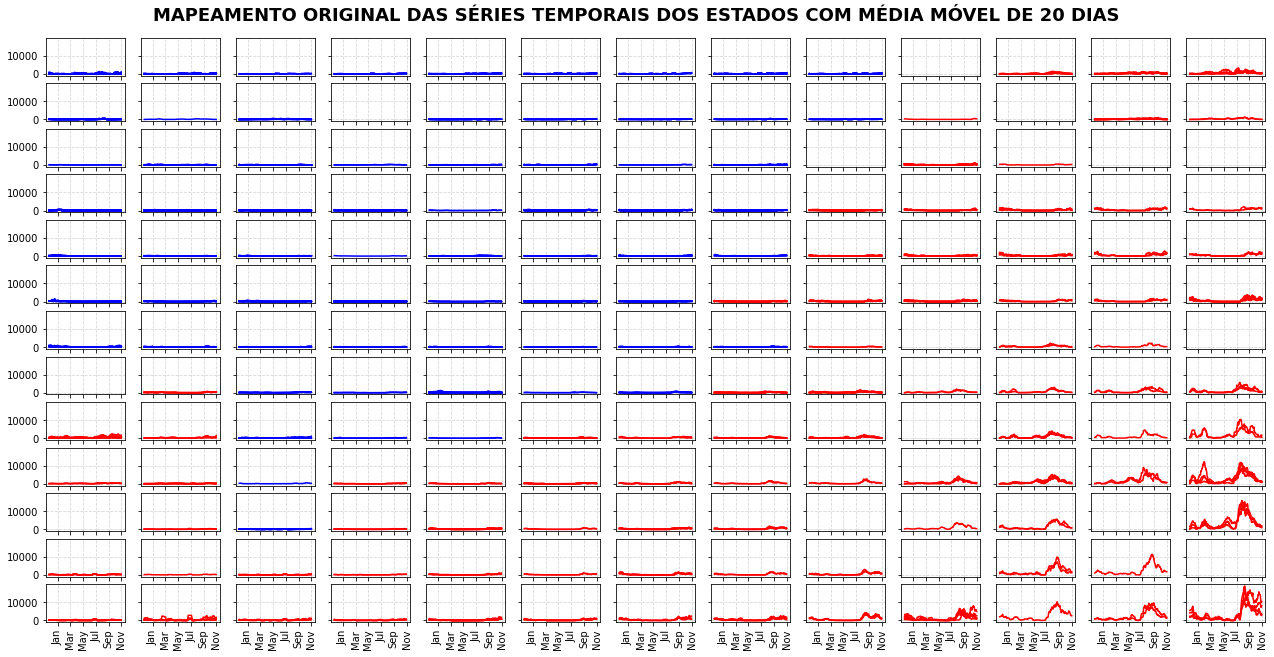

In [71]:
dpi = 100
width = np.round(1366 * 160 / 100)
height = 768*1.4

fig, ax = plt.subplots(nrow, ncol, figsize=(width/dpi, height/dpi), 
                                            sharex=True, sharey=True, facecolor='w')

fig.suptitle("MAPEAMENTO ORIGINAL DAS SÉRIES TEMPORAIS DOS ESTADOS COM MÉDIA MÓVEL DE 20 DIAS", 
             y=0.92, fontsize=18, fontweight='bold')

for i, (uf, row) in  enumerate(pivot.T.iterrows()):
    x, y = SOM.winner(row.values)
    ax[(ncol-1)-y][x].plot(row.rolling(window=20).mean(), color=ngdf.loc[uf].color[0])

for i in range(nrow*ncol):
    row = i//nrow
    col = i%ncol
    ax[row][col].grid(ls='--', alpha=0.5)
    if col == 0:
#         ax[row][col].set_ylabel("Flashes")
        pass
    if row == nrow-1:
#         ax[row][col].set_xlabel("Período")
        ax[row][col].set_xticklabels(['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan'])
        ax[row][col].tick_params(axis='x', rotation=90)
                       
plt.savefig(f"../neurons_series_uf_mean10d_origal_city.png",                                            
                transparent=False, bbox_inches='tight', pad_inches=0.1)